# Bienvenidos al Hackathon Barcelona este repositorio es creado por Josue(Data_pathfinder)(https://josh1313.github.io/JoshProyecgithhub.io/)
las instrucciones de admision hacer un preprocesamiento y aplicar un PCA a 2 data set que ellos proveeron(3) y tomar en cuenta uno de base y el otro a elegir en el cual el de base es lloguer_prem_trim y el otro que elegi fue accidents_causa_conductor

Iniciaremos con un EDA  por cada conjunto de datos y despues de hacer unos cambios , los juntaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

df = pd.read_csv(r"C:\Users\JOSUE\Downloads\hackathon\2017_lloguer_preu_trim.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [4]:
df.shape

(584, 8)

In [5]:
df.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,546.000000
mean,2017.0,2.500000,6.246575,37.000000,421.009231
std,0.0,1.118992,2.790726,21.089371,446.178147
min,2017.0,1.000000,1.000000,1.000000,4.450000
25%,2017.0,1.750000,4.000000,19.000000,12.645000
50%,2017.0,2.500000,7.000000,37.000000,161.565000
75%,2017.0,3.250000,8.000000,55.000000,770.347500
max,2017.0,4.000000,10.000000,73.000000,1882.420000


In [6]:
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


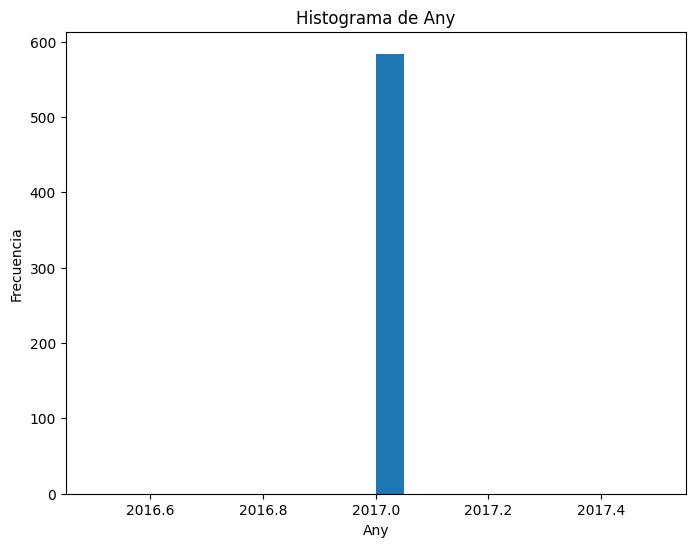

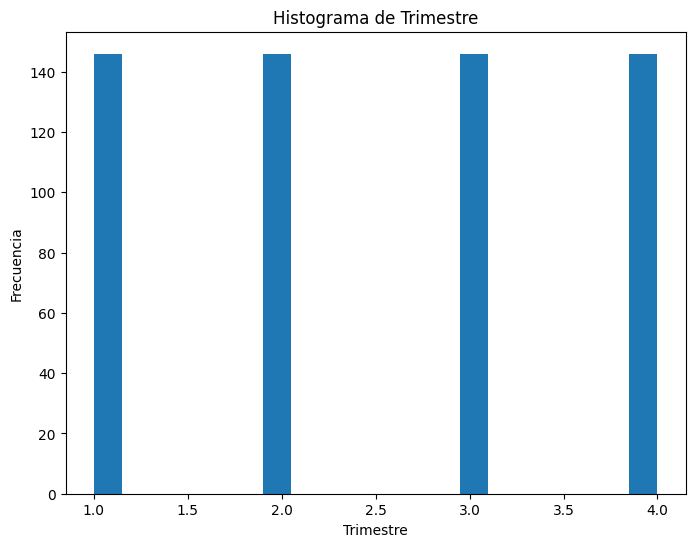

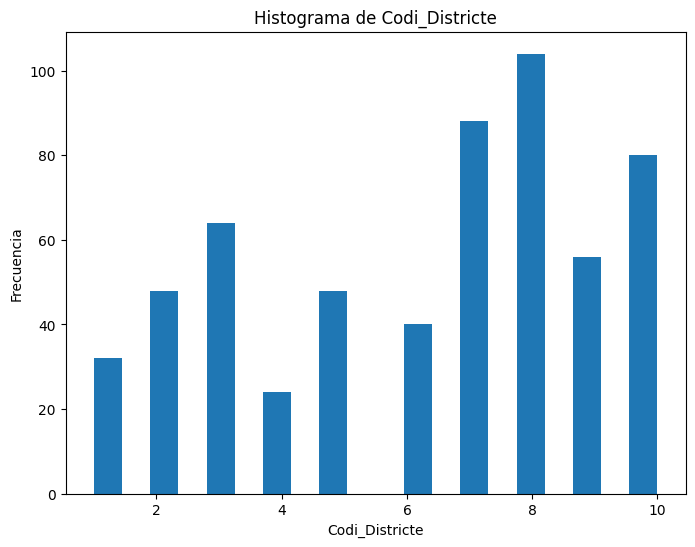

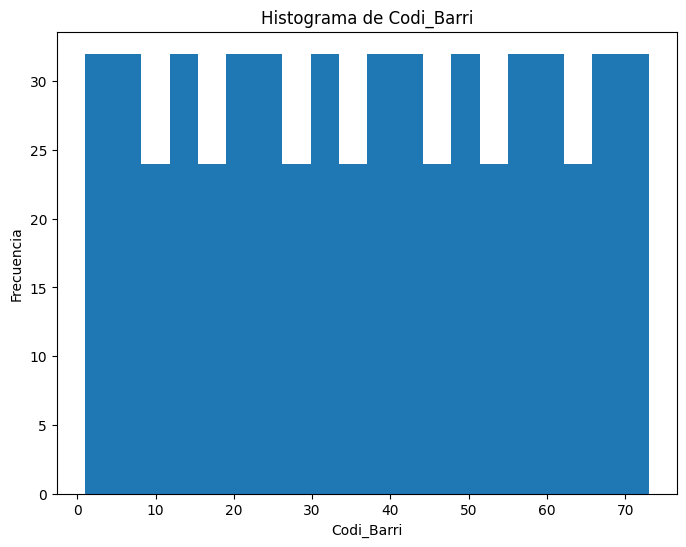

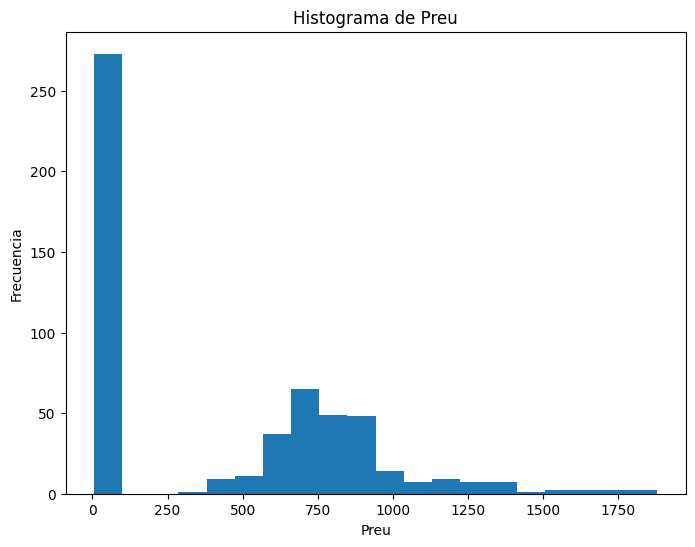

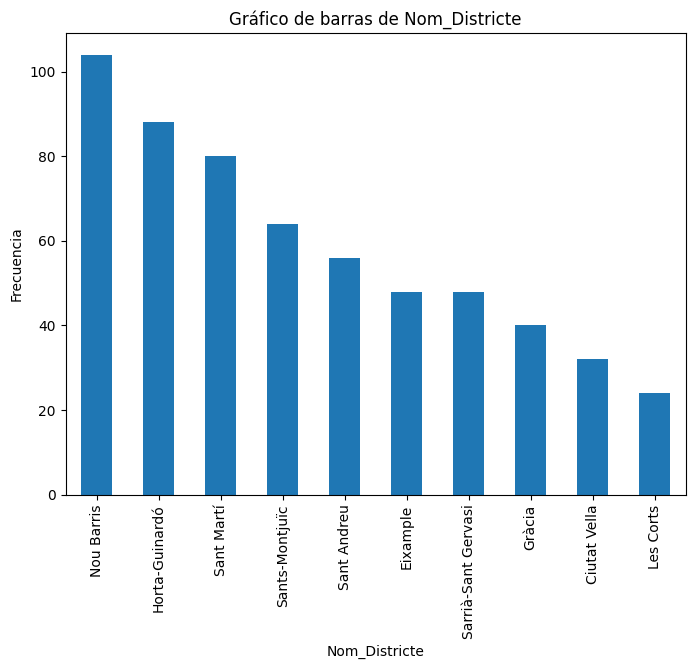

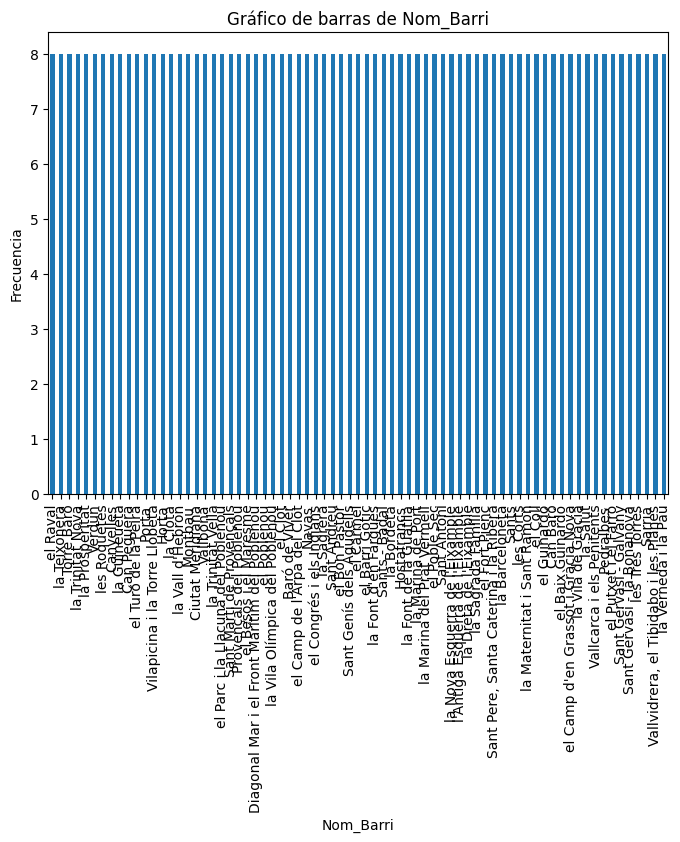

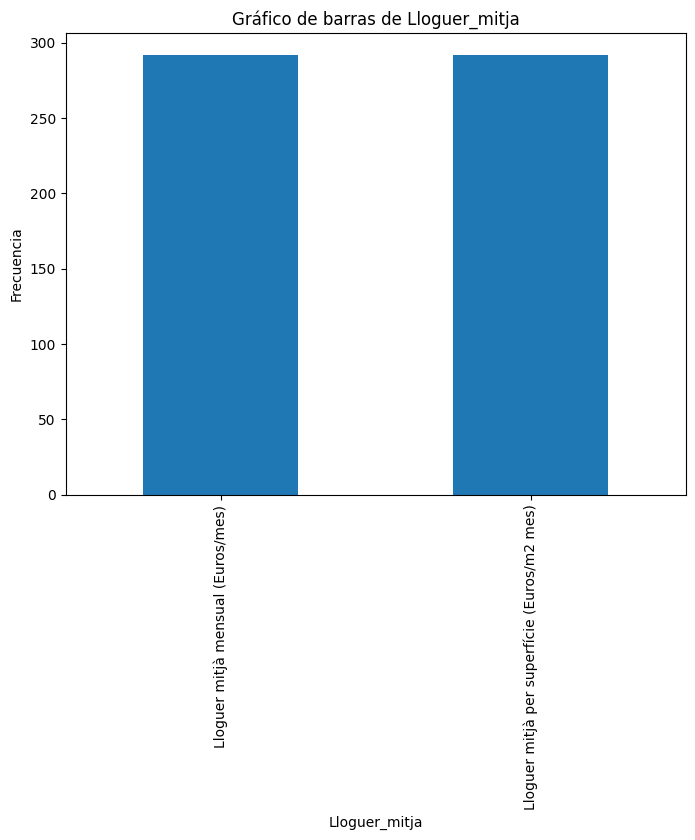

In [7]:
def plot_variables(df):
    # Obtener listas de columnas por tipo de datos
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    boolean_cols = df.select_dtypes(include=['bool']).columns

    # Graficar variables numéricas
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Histograma de {col}')
        plt.show()

    # Graficar variables categóricas
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Gráfico de barras de {col}')
        plt.show()

    # Graficar variables booleanas
    for col in boolean_cols:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Gráfico de barras de {col}')
        plt.show()


plot_variables(df)

In [8]:
df.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              38
dtype: int64

In [9]:
df.duplicated().sum()

0

En el primer conjunto de dato df encontre variables descriptivas que haran mucho ruido asi que cree una copia df2 en la cual borre las descriptivas para que queden de referencia y tambien modifique nombres de variables ojo no he imputados nulos eso lo hare cuando el conjunto de datos este junto , esto se hace con la intencion de hacer aunque no lo han pedido de hacer un modelo de regresion en el cual podamos predecir el precio promedio mensual de alquiler por distrito y barrio pero vamos por ello

In [10]:
df2 = df.copy()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [12]:
df2.drop(['Any', 'Nom_Barri', 'Lloguer_mitja', 'Nom_Districte'], axis=1, inplace=True)


In [13]:
# no me gusta que los nombre de las columnas esten en mayusculas los cambiare a todo minusculas y tambien ambiare el nombre del precio
df2.columns = df2.columns.str.lower()
df2.rename(columns={'preu': 'lloguer mitjà mensual'}, inplace=True)

In [14]:
df2.head()

,trimestre,codi_districte,codi_barri,lloguer mitjà mensual
0,1,1,1,734.99
1,1,1,2,905.26
2,1,1,3,722.78
3,1,1,4,895.28
4,1,2,5,871.08


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trimestre              584 non-null    int64  
 1   codi_districte         584 non-null    int64  
 2   codi_barri             584 non-null    int64  
 3   lloguer mitjà mensual  546 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 18.4 KB


In [16]:
df2.shape

(584, 4)

Empezaremos analizar el segundo conjunto de datos

In [17]:
df3 = pd.read_csv(r"C:\Users\JOSUE\Downloads\hackathon\2017_accidents_causa_conductor_gu_bcn_.csv")

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11091 entries, 0 to 11090
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            11091 non-null  object 
 1   Codi_districte              11091 non-null  int64  
 2   Nom_districte               11091 non-null  object 
 3   Codi_barri                  11091 non-null  int64  
 4   Nom_barri                   11091 non-null  object 
 5   Codi_carrer                 11091 non-null  int64  
 6   Nom_carrer                  11091 non-null  object 
 7   Num_postal                  11089 non-null  object 
 8   Descripcio_dia_setmana      11091 non-null  object 
 9   NK_Any                      11091 non-null  int64  
 10  Mes_any                     11091 non-null  int64  
 11  Nom_mes                     11091 non-null  object 
 12  Dia_mes                     11091 non-null  int64  
 13  Hora_dia                    110

In [19]:
df3.head(15)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Desconegut,-1,Desconegut,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1,2017S007937,-1,Desconegut,-1,Desconegut,-1,Joan XXIII / Martí i Franquès ...,NaN,Dimarts,2017,9,Setembre,26,9,Gir indegut o sense precaució,Matí,426505.49,4581655.96,2.199239,41.419635
2,2017S004739,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,900,Dilluns,2017,5,Maig,29,22,Manca d'atenció a la conducció,Nit,432587.59,4584475.05,2.186875,41.412198
3,2017S008779,-1,Desconegut,-1,Desconegut,-1,Número 6 Zona Franca / A Zona Franca ...,NaN,Dilluns,2017,10,Octubre,23,22,Desobeir altres senyals,Nit,427519.99,4575229.36,2.190955,41.406769
4,2017S004350,-1,Desconegut,-1,Desconegut,-1,Aguilar ...,7-9,Dimarts,2017,5,Maig,16,14,Altres,Tarda,430758.19,4586316.94,2.186557,41.409004
5,2017S004109,-1,Desconegut,-1,Desconegut,-1,Zona Franca ...,3,Diumenge,2017,5,Maig,7,21,No determinada,Tarda,428629.73,4578230.12,2.184520,41.406912
6,2017S004184,-1,Desconegut,-1,Desconegut,-1,Aribau ...,197-199,Dijous,2017,5,Maig,11,9,Canvi de carril sense precaució,Matí,429014.84,4583215.45,2.185863,41.402617
7,2017S006855,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,140,Dimecres,2017,8,Agost,9,5,No determinada,Nit,427871.64,4579858.44,2.188682,41.403765
8,2017S003196,-1,Desconegut,-1,Desconegut,-1,Sentís ...,0025,Dijous,2017,4,Abril,6,15,Manca d'atenció a la conducció,Tarda,433922.08,4587917.81,2.188340,41.411351
9,2017S005627,-1,Desconegut,-1,Desconegut,-1,Mare de Déu de Port ...,54,Dimecres,2017,6,Juny,28,12,Altres,Matí,429399.61,4578430.43,2.187172,41.407432


Revisaremos la variable desconegut y si no hay informacion valiosa o pertinente a otro barrio o calle la borraremos ya que hace mas ruido de lo que ayuda

In [20]:
filtro = df3['Nom_districte'] == 'Desconegut'
conjunto_filtrado = df3[filtro]


In [21]:
conjunto_filtrado = conjunto_filtrado.reset_index(drop=True)

In [22]:
conjunto_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            104 non-null    object 
 1   Codi_districte              104 non-null    int64  
 2   Nom_districte               104 non-null    object 
 3   Codi_barri                  104 non-null    int64  
 4   Nom_barri                   104 non-null    object 
 5   Codi_carrer                 104 non-null    int64  
 6   Nom_carrer                  104 non-null    object 
 7   Num_postal                  102 non-null    object 
 8   Descripcio_dia_setmana      104 non-null    object 
 9   NK_Any                      104 non-null    int64  
 10  Mes_any                     104 non-null    int64  
 11  Nom_mes                     104 non-null    object 
 12  Dia_mes                     104 non-null    int64  
 13  Hora_dia                    104 non

In [23]:
conjunto_filtrado['Nom_carrer'].value_counts()

Nom_carrer
Desconegut                                            93
Corts Catalanes                                        2
Motors                                                 1
Joan XXIII / Martí i Franquès                          1
Número 6 Zona Franca / A Zona Franca                   1
Aguilar                                                1
Zona Franca                                            1
Aribau                                                 1
Sentís                                                 1
Mare de Déu de Port                                    1
Francesc Ferrer i Guàrdia                              1
Name: count, dtype: int64

In [24]:
# borraremos la filas Desconegut ya que no aportan
df3 = df3[df3['Nom_districte'] != 'Desconegut']


In [25]:
# reseteamos el indice df3
df3 = df3.reset_index(drop=True)

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            10987 non-null  object 
 1   Codi_districte              10987 non-null  int64  
 2   Nom_districte               10987 non-null  object 
 3   Codi_barri                  10987 non-null  int64  
 4   Nom_barri                   10987 non-null  object 
 5   Codi_carrer                 10987 non-null  int64  
 6   Nom_carrer                  10987 non-null  object 
 7   Num_postal                  10987 non-null  object 
 8   Descripcio_dia_setmana      10987 non-null  object 
 9   NK_Any                      10987 non-null  int64  
 10  Mes_any                     10987 non-null  int64  
 11  Nom_mes                     10987 non-null  object 
 12  Dia_mes                     10987 non-null  int64  
 13  Hora_dia                    109

In [27]:
df3.head(2)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S010628,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0293 0293,Diumenge,2017,12,Desembre,24,0,Gir indegut o sense precaució,Nit,432141.03,4585382.64,2.190956,41.409311
1,2017S003663,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0323 0325,Dilluns,2017,4,Abril,24,21,Desobeir semàfor,Tarda,432024.02,4585501.49,2.196339,41.413514


In [28]:
# cambiamos a minusculas todos los nombres de las variables para hacer el merge
df3.columns = df3.columns.str.lower()

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numero_expedient            10987 non-null  object 
 1   codi_districte              10987 non-null  int64  
 2   nom_districte               10987 non-null  object 
 3   codi_barri                  10987 non-null  int64  
 4   nom_barri                   10987 non-null  object 
 5   codi_carrer                 10987 non-null  int64  
 6   nom_carrer                  10987 non-null  object 
 7   num_postal                  10987 non-null  object 
 8   descripcio_dia_setmana      10987 non-null  object 
 9   nk_any                      10987 non-null  int64  
 10  mes_any                     10987 non-null  int64  
 11  nom_mes                     10987 non-null  object 
 12  dia_mes                     10987 non-null  int64  
 13  hora_dia                    109

In [30]:
merged_df = df2.merge(df3, on=['codi_districte', 'codi_barri'], how='outer')


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87896 entries, 0 to 87895
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trimestre                   87896 non-null  int64  
 1   codi_districte              87896 non-null  int64  
 2   codi_barri                  87896 non-null  int64  
 3   lloguer mitjà mensual       85188 non-null  float64
 4   numero_expedient            87896 non-null  object 
 5   nom_districte               87896 non-null  object 
 6   nom_barri                   87896 non-null  object 
 7   codi_carrer                 87896 non-null  int64  
 8   nom_carrer                  87896 non-null  object 
 9   num_postal                  87896 non-null  object 
 10  descripcio_dia_setmana      87896 non-null  object 
 11  nk_any                      87896 non-null  int64  
 12  mes_any                     87896 non-null  int64  
 13  nom_mes                     878

In [32]:
merged_df.head(10)

,trimestre,codi_districte,codi_barri,lloguer mitjà mensual,numero_expedient,nom_districte,nom_barri,codi_carrer,nom_carrer,num_postal,...,mes_any,nom_mes,dia_mes,hora_dia,descripcio_torn,descripcio_causa_conductor,coordenada_utm_x_ed50,coordenada_utm_y_ed50,longitud,latitud
0,1,1,1,734.99,2017S006048,Ciutat Vella,el Raval,701349,Drassanes,0001 0001,...,7,Juliol,11,23,No cedir la dreta,Nit,431242.62,4580854.67,2.176656,41.374429
1,1,1,1,734.99,2017S000279,Ciutat Vella,el Raval,234602,Om,0050 0052,...,1,Gener,12,8,No respectat pas de vianants,Matí,433029.72,4582773.38,2.197812,41.391862
2,1,1,1,734.99,2017S002180,Ciutat Vella,el Raval,158752,Hort de la Bomba,0000 0000,...,3,Març,18,5,Manca d'atenció a la conducció,Nit,432967.31,4582289.90,2.197119,41.387502
3,1,1,1,734.99,2017S003553,Ciutat Vella,el Raval,86902,Nou de la Rambla,0030 0030,...,4,Abril,21,9,No determinada,Matí,430979.70,4581280.04,2.173464,41.378238
4,1,1,1,734.99,2017S001375,Ciutat Vella,el Raval,308800,Sant Pacià,0011 0011,...,2,Febrer,18,19,No respectar distàncies,Tarda,431178.84,4581196.59,2.175854,41.377503
5,1,1,1,734.99,2017S008087,Ciutat Vella,el Raval,282106,Riera Alta,0027 0027,...,10,Octubre,1,7,Manca d'atenció a la conducció,Matí,430379.02,4581528.75,2.166252,41.380426
6,1,1,1,734.99,2017S000908,Ciutat Vella,el Raval,34308,Rambla,0021 0021,...,2,Febrer,2,16,Altres,Tarda,430611.47,4581360.46,2.169051,41.378931
7,1,1,1,734.99,2017S002251,Ciutat Vella,el Raval,500,Abat Safont,0002X0002X,...,3,Març,20,23,Altres,Nit,431214.13,4580892.36,2.176311,41.374766
8,1,1,1,734.99,2017S010535,Ciutat Vella,el Raval,275450,Raquel Meller,0001 0001X,...,12,Desembre,20,15,Desconegut,Tarda,430686.86,4580920.06,2.170003,41.374971
9,1,1,1,734.99,2017S004385,Ciutat Vella,el Raval,157909,Hospital,0001 0001,...,5,Maig,17,15,Avançament defectuós/improcedent,Tarda,430948.62,4581599.25,2.173055,41.381110


In [33]:
merged_df.isnull().sum()

trimestre                        0
codi_districte                   0
codi_barri                       0
lloguer mitjà mensual         2708
numero_expedient                 0
nom_districte                    0
nom_barri                        0
codi_carrer                      0
nom_carrer                       0
num_postal                       0
descripcio_dia_setmana           0
nk_any                           0
mes_any                          0
nom_mes                          0
dia_mes                          0
hora_dia                         0
descripcio_torn                  0
descripcio_causa_conductor       0
coordenada_utm_x_ed50            0
coordenada_utm_y_ed50            0
longitud                         0
latitud                          0
dtype: int64

In [35]:
merged_df.head()

,trimestre,codi_districte,codi_barri,lloguer mitjà mensual,numero_expedient,nom_districte,nom_barri,codi_carrer,nom_carrer,num_postal,...,mes_any,nom_mes,dia_mes,hora_dia,descripcio_torn,descripcio_causa_conductor,coordenada_utm_x_ed50,coordenada_utm_y_ed50,longitud,latitud
0,1,1,1,734.99,2017S006048,Ciutat Vella,el Raval,701349,Drassanes,0001 0001,...,7,Juliol,11,23,No cedir la dreta,Nit,431242.62,4580854.67,2.176656,41.374429
1,1,1,1,734.99,2017S000279,Ciutat Vella,el Raval,234602,Om,0050 0052,...,1,Gener,12,8,No respectat pas de vianants,Matí,433029.72,4582773.38,2.197812,41.391862
2,1,1,1,734.99,2017S002180,Ciutat Vella,el Raval,158752,Hort de la Bomba,0000 0000,...,3,Març,18,5,Manca d'atenció a la conducció,Nit,432967.31,4582289.90,2.197119,41.387502
3,1,1,1,734.99,2017S003553,Ciutat Vella,el Raval,86902,Nou de la Rambla,0030 0030,...,4,Abril,21,9,No determinada,Matí,430979.70,4581280.04,2.173464,41.378238
4,1,1,1,734.99,2017S001375,Ciutat Vella,el Raval,308800,Sant Pacià,0011 0011,...,2,Febrer,18,19,No respectar distàncies,Tarda,431178.84,4581196.59,2.175854,41.377503
